# IMPORTANDO BIBLIOTECAS
---

In [6]:
import numpy as np
import open3d as o3
from open3d import JVisualizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import matplotlib.gridspec as gsd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('default') # para ver todos os estilos: print(plt.style.available)

plt.rc('text', usetex=False) # não funciona no Codelabs
plt.rc('font', family='serif', size=12)

# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

## DESENVOLVIMENTO
---

In [3]:
# pc_path = "suzie2.ply"
pc_path = "nuvem.ply"
# pc_path = "/home/reginaldo/nuvem3.xyz"

### Importing with Open3d
---

In [3]:
pcd_pc = o3.read_point_cloud(pc_path)

In [176]:
pcd = np.asarray(pcd_pc.points)
# rgb = np.asarray(pcs_pc.colors)
print ('pcs.shape: ',pcd.shape)
# print ('rgb.shape: ',pcs.shape)

pcs.shape:  (32178222, 3)


### Importing with Numpy
---

In [532]:
ratio = 100
pcs = pcd[::ratio].copy()
pcs.shape

# Normalizando

for i in range(3):
    pcs[:,i] = pcs[:,i] - pcs[:,i].min()
    pcs[:,i] = pcs[:,i]/pcs[:,i].max()
    print ('Coluna:', i, ' min:',pcs[:,i].min(), ' max:',pcs[:,i].max())

(321783, 3)

Coluna: 0  min: 0.0  max: 1.0
Coluna: 1  min: 0.0  max: 1.0
Coluna: 2  min: 0.0  max: 1.0


In [533]:
i = 5
j = 5
division = 10
# dosel = np.array([])
# division = 100
# for i in range(division):
#     for j in range(division):
xMin = i/division
xMax = (i + 1)/division
yMin = j/division
yMax = (j + 1)/division

mask = (((xMin < pcs[:,0]) & (pcs[:,0] < xMax)) & ((yMin < pcs[:,1]) &  (pcs[:,1] < yMax)))
#         pcs[mask].shape

section = pcs[mask,2]
if section.size > 0:
    media = section.mean()
    alturaSolo = (section < media).mean()
    alturaTopo = (section > media).mean()
#     mask_solo = section < media
#     mask_topo = section >= media
#     topo = section[mask_topo]  - alturaSolo
#     section = 0
            
#             section[mask_topo] = topo
            
            
#             maior_que_media = section[section[:,2] < section[:,2].mean()]
#             section[mask_solo] = 0
#             section[mask_topo] = section[mask_topo] - alturaSolo 
#         section[section > media] - alturaSolo
    print ('media:',media, 'alturaSolo:', alturaSolo, 'alturaTopo:', alturaTopo)
    pcs[mask,2] = section
            

media: 0.6364419561622692 alturaSolo: 0.24798734905117883 alturaTopo: 0.7520126509488212


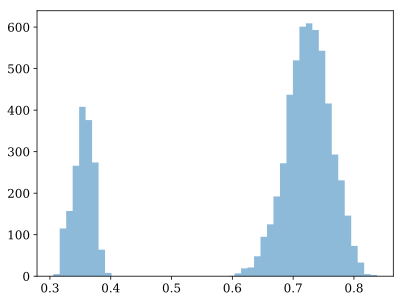

In [534]:
setor  = pcs[mask]

plt.hist(setor[:,2], bins=50, histtype='stepfilled', alpha=0.5);

In [518]:
# Pass xyz to Open3D.PointCloud and visualize

pcd2 = o3.PointCloud()
pcd2.points = o3.Vector3dVector(setor)

type(pcd_pc)
print(pcd_pc)

open3d.open3d.PointCloud

PointCloud with 32178222 points.


In [535]:
# Visualising Point Cloud

o3.draw_geometries([pcd2, line_set])

In [148]:
ax = plt.axes(projection='3d')
ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], cmap='viridis', linewidth=0.5);

ValueError: Unknown projection '3d'

<Figure size 640x480 with 0 Axes>

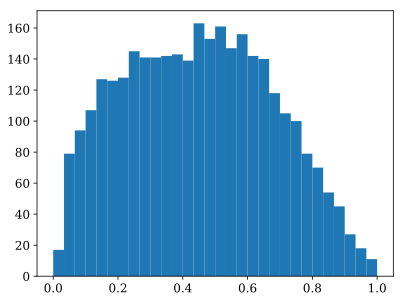

In [153]:
plt.hist(pcs[:,1], bins=30);

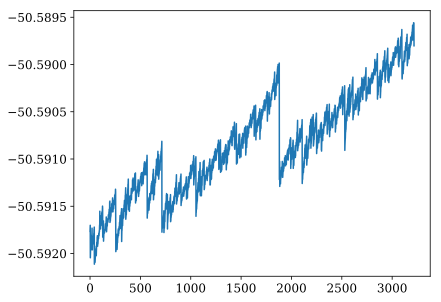

In [32]:
plt.plot(pc_sparce[:,0])

In [33]:
plt.hist(pc_sparce[-50.5913 < pc_sparce[:,0] < -50.5905][0], bins=100);

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
pc_sparce[-50.5913 < pc_sparce[:,0] < -50.5905].shape

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
pc_sparce[0].shape

(3,)

In [170]:
data = np.zeros(32178222 * 6).reshape(32178222, 6)

In [171]:
data[:,0:3] = np.asarray(ptc.points)
# data[:,3:6] = np.asarray(ptc.colors)

In [167]:
data.shape

(32178222, 6)

In [155]:
data.shape

(32178222, 3)

In [168]:
data[0]

array([-5.05917664e+01, -2.59261112e+01,  7.18065063e+02,  6.19607843e-01,
        6.03921569e-01,  5.56862745e-01])

In [102]:
downptc = o3.voxel_down_sample(ptc, voxel_size = 0.05)

TypeError: voxel_down_sample(): incompatible function arguments. The following argument types are supported:
    1. (input: open3d.open3d.PointCloud, voxel_size: float) -> open3d.open3d.PointCloud

Invoked with: TriangleMesh with 188924 points and 62976 triangles.; kwargs: voxel_size=0.05

In [43]:
visualizer = JVisualizer()
visualizer.add_geometry(downptc)
visualizer.show()

JVisualizer with 1 geometries

In [92]:
def custom_draw_geometry_with_rotation(pcd):
    def rotate_view(vis):
        ctr  = vis.get_view_control()
        ctr.rotate(0.0, 2.0)
        return False
    o3.draw_geometries_with_animation_callback([pcd], rotate_view)

In [90]:
custom_draw_geometry_with_rotation(ptc)

In [23]:
def custom_draw_geometry(pcd):
    # The following code achieves the same effect as:
    # draw_geometries([pcd])
    vis = o3.Visualizer()
    vis.create_window()
    vis.add_geometry(pcd)
    vis.run()
    vis.destroy_window()

In [81]:
custom_draw_geometry(downptc)

# SANDBOX
---

In [45]:
a = np.empty(10).reshape(2,5)
a.shape

(2, 5)

In [265]:
a = np.arange(100)
a
(10<a) & (a<50)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [25]:
print("Let\'s draw a cubic using LineSet")
points = [[0,0,0],[1,0,0],[0,1,0],[1,1,0],
          [0,0,1],[1,0,1],[0,1,1],[1,1,1]]
lines = [[0,1],[0,2],[1,3],[2,3],
         [4,5],[4,6],[5,7],[6,7],
         [0,4],[1,5],[2,6],[3,7]]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = o3.LineSet()
line_set.points = o3.Vector3dVector(points)
line_set.lines = o3.Vector2iVector(lines)
line_set.colors = o3.Vector3dVector(colors)
o3.draw_geometries([line_set])

Let's draw a cubic using LineSet


In [120]:
# examples/Python/Tutorial/Basic/working_with_numpy.py

import copy
import numpy as np
from open3d import *

if __name__ == "__main__":

    # generate some neat n times 3 matrix using a variant of sync function
    x = np.linspace(-3, 3, 401)
    mesh_x, mesh_y = np.meshgrid(x,x)
    z = np.sinc((np.power(mesh_x,2)+np.power(mesh_y,2)))
    z_norm = (z-z.min())/(z.max()-z.min())
    xyz = np.zeros((np.size(mesh_x),3))
    xyz[:,0] = np.reshape(mesh_x,-1)
    xyz[:,1] = np.reshape(mesh_y,-1)
    xyz[:,2] = np.reshape(z_norm,-1)
    print('xyz')
    print(xyz)

xyz
[[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


In [122]:
z.shape
z_norm.shape

(401, 401)

(401, 401)

In [100]:
    # Pass xyz to Open3D.PointCloud and visualize
    pcd = PointCloud()
    pcd.points = Vector3dVector(xyz)
    write_point_cloud("../../TestData/sync.ply", pcd)

    # Load saved point cloud and visualize it
    pcd_load = read_point_cloud("../../TestData/sync.ply")
    draw_geometries([pcd_load])

    # convert Open3D.PointCloud to numpy array
    xyz_load = np.asarray(pcd_load.points)
    print('xyz_load')
    print(xyz_load)

    # save z_norm as an image (change [0,1] range to [0,255] range with uint8 type)
    img = Image((z_norm*255).astype(np.uint8))
    write_image("../../TestData/sync.png", img)
    draw_geometries([img])
    
  

xyz
[[-3.         -3.          0.17846472]
 [-2.985      -3.          0.17440115]
 [-2.97       -3.          0.17063709]
 ...
 [ 2.97        3.          0.17063709]
 [ 2.985       3.          0.17440115]
 [ 3.          3.          0.17846472]]


False

xyz_load
[]


False

In [124]:
pcs[mask].shape

(7287, 3)

In [119]:
z.shape
type(pcd2)
type(z_norm)
type(img)

# img2  = o3.Image(pcd2)

#
# plt.imshow(pcd2)

(401, 401)

open3d.open3d.PointCloud

numpy.ndarray

open3d.open3d.Image

In [52]:
x = np.arange(10000).reshape(100, 100)
x

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [59]:
x[(x[:,0] < 200) & (x[:,1] < 300)] 

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [65]:
xx = np.random.rand(100)
yy = np.random.rand(100)


In [72]:
X, Y = np.meshgrid (xx, yy)
X.shape
Y.shape

(100, 100)

(100, 100)

In [74]:
Z = X + Y
Z.shape

(100, 100)

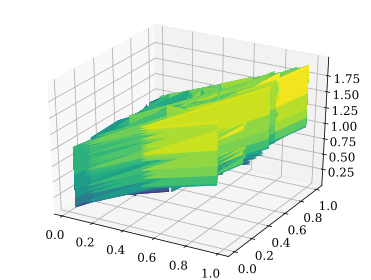

In [75]:
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z, cmap='viridis', linewidth=0.5);